# Step 1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Kyphosis_df=pd.read_csv('kyphosis.csv')

In [3]:
Kyphosis_df.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


# Visualisation

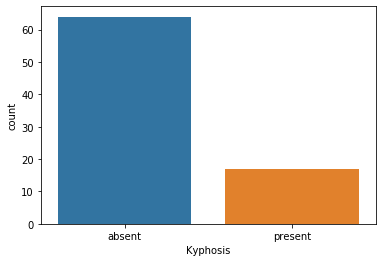

In [6]:
sns.countplot(Kyphosis_df['Kyphosis'])

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
LabelEncoder_y=LabelEncoder()
Kyphosis_df['Kyphosis']=LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [8]:
Kyphosis_df.head(5)

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [10]:
Kyphosis_true=Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [11]:
Kyphosis_false=Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [16]:
print("Disease percentage persistence after the operation =",(len(Kyphosis_true)/len(Kyphosis_df)*100),"%")

Disease percentage persistence after the operation = 20.98765432098765 %


In [17]:
print("Disease percentage removal after the operation =",(len(Kyphosis_false)/len(Kyphosis_df)*100),"%")

Disease percentage removal after the operation = 79.01234567901234 %


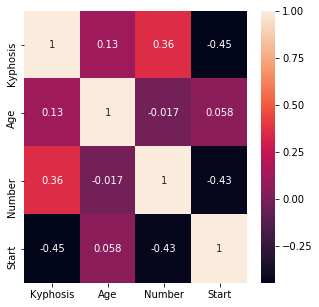

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(Kyphosis_df.corr(),annot=True)

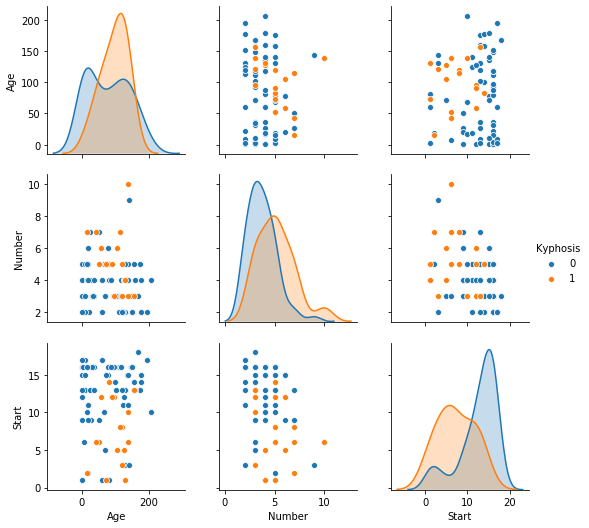

In [24]:
sns.pairplot(Kyphosis_df,hue='Kyphosis',vars=['Age','Number','Start'])

# Training and Testing Database

In [27]:
X=Kyphosis_df.drop(['Kyphosis'],axis=1)

In [31]:
y=Kyphosis_df['Kyphosis']

In [32]:
from sklearn.model_selection import train_test_split


In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Train Model

In [35]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
Important_Features=pd.DataFrame(DecisionTree.feature_importances_,index=X_train.columns,
                                columns=['importance']).sort_values('importance',ascending=False)


In [39]:
Important_Features

,importance
Age,0.492734
Start,0.265309
Number,0.241956


# Evaluate Model

In [40]:
from sklearn.metrics import classification_report,confusion_matrix


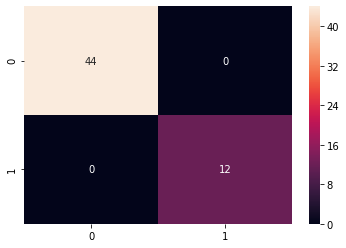

In [43]:
y_predict_train=DecisionTree.predict(X_train)
y_predict_train
cm=confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot=True)

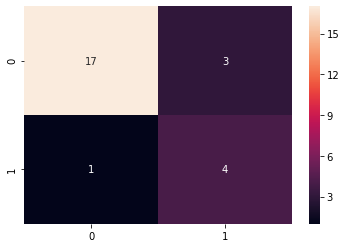

In [44]:
y_predict_test=DecisionTree.predict(X_test)
y_predict_train
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [45]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.57      0.80      0.67         5

    accuracy                           0.84        25
   macro avg       0.76      0.82      0.78        25
weighted avg       0.87      0.84      0.85        25



# Improve

In [50]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=100)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

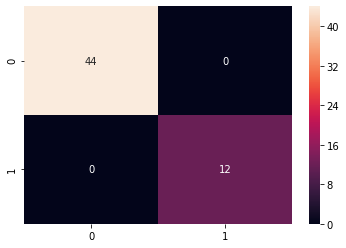

In [51]:
y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

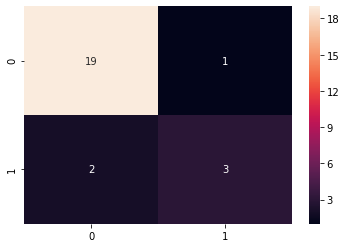

In [52]:
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [53]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.75      0.60      0.67         5

    accuracy                           0.88        25
   macro avg       0.83      0.77      0.80        25
weighted avg       0.87      0.88      0.87        25

